# Unsupervised Machine Learning

In the previous chapters, we used supervised learning techniques to build machine learning models using data where the answer was already known—the class labels were already available in our training data. 

In this chapter, we will explore cluster analysis, a category of unsupervised learning techniques that allows us to discover hidden structures in data where we do not know the right answer upfront.

The goal of clustering is to find a natural grouping in data such that items in the same cluster are more similar to each other than those from different clusters.

 - Two broad categories in unsupervised learning algorithm is 
    1. clustering
    2. PCA, SVD, LDA etc

 1. Clustering is primarily an exploratory technique to discover hidden structures of the data, as a prelude to more focussed analysis and decision process
 2. A way to decompose dataset into subsets with each subset representing a group with similar characterstics
 3. When we cluster observations we seek to partition them into distinct groups such that objects in the same group are more similar to each other in some sense than to objects of different groups
 4. The groups are called as clusters and each cluster get distinct label called cluster id, based on the centroid of the cluster
 5. Clustering is oftrn used as a lead-in to classification. Once the clusters are identified, labels can be applied to each cluster to classify each group based on its characterstics
 6. Clustering helps simplifying the data representation through the centroid methods

 - Integral part of Exploratory Data Analytics - We must always do this to find any information in the data
 - We dont necessarily build models here, We use techniques to understand what data is telling us

 - We might find some information hidden that can help you build better models

I might be the case that we build different kind of models for different clusters

There are two types of Clustering - 
1. Flat 
    - K means*
    - DBScan
2. hierarchical
    - Agglomartive*
    - Divisive 

# Titanic DataSet

In [60]:
train_df = pd.read_csv('/Users/rahulgarg/github/AnalyticsCourse/datasets/titanic/train.csv')
# Impute Missing Values
train_df['Age'] = train_df.Age.fillna(28.0)

train_df['Fare'] = train_df['Fare'].astype(int)

train_df['Embarked'] = train_df.Embarked.fillna('S')
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket  Fare Cabin Embarked  
0      0         A/5 21171     7   NaN        S  
1      0          PC 17599    71   C85        C  
2      0  STON/O2. 3101282     7   NaN        S  
3      0            113803    53  C123        S  
4      0            373450     8   NaN        S

In [80]:
train_df.loc[train_df.Age == 28,:].Survived.value_counts()

0    143
1     59
Name: Survived, dtype: int64

In [81]:
59/143

0.4125874125874126

In [65]:
train_df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

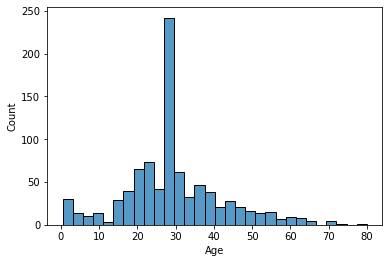

In [66]:
sns.histplot(train_df.Age)

In [71]:
age_frequency_df = train_df.Age.value_counts()
age_frequency_df

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
55.50      1
70.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

Text(0, 0.5, 'Frequency/Count')

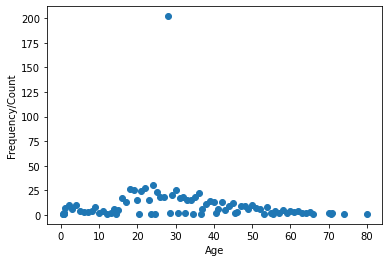

In [78]:
plt.scatter(age_frequency_df.index, age_frequency_df)
plt.xlabel('Age')
plt.ylabel('Frequency/Count')

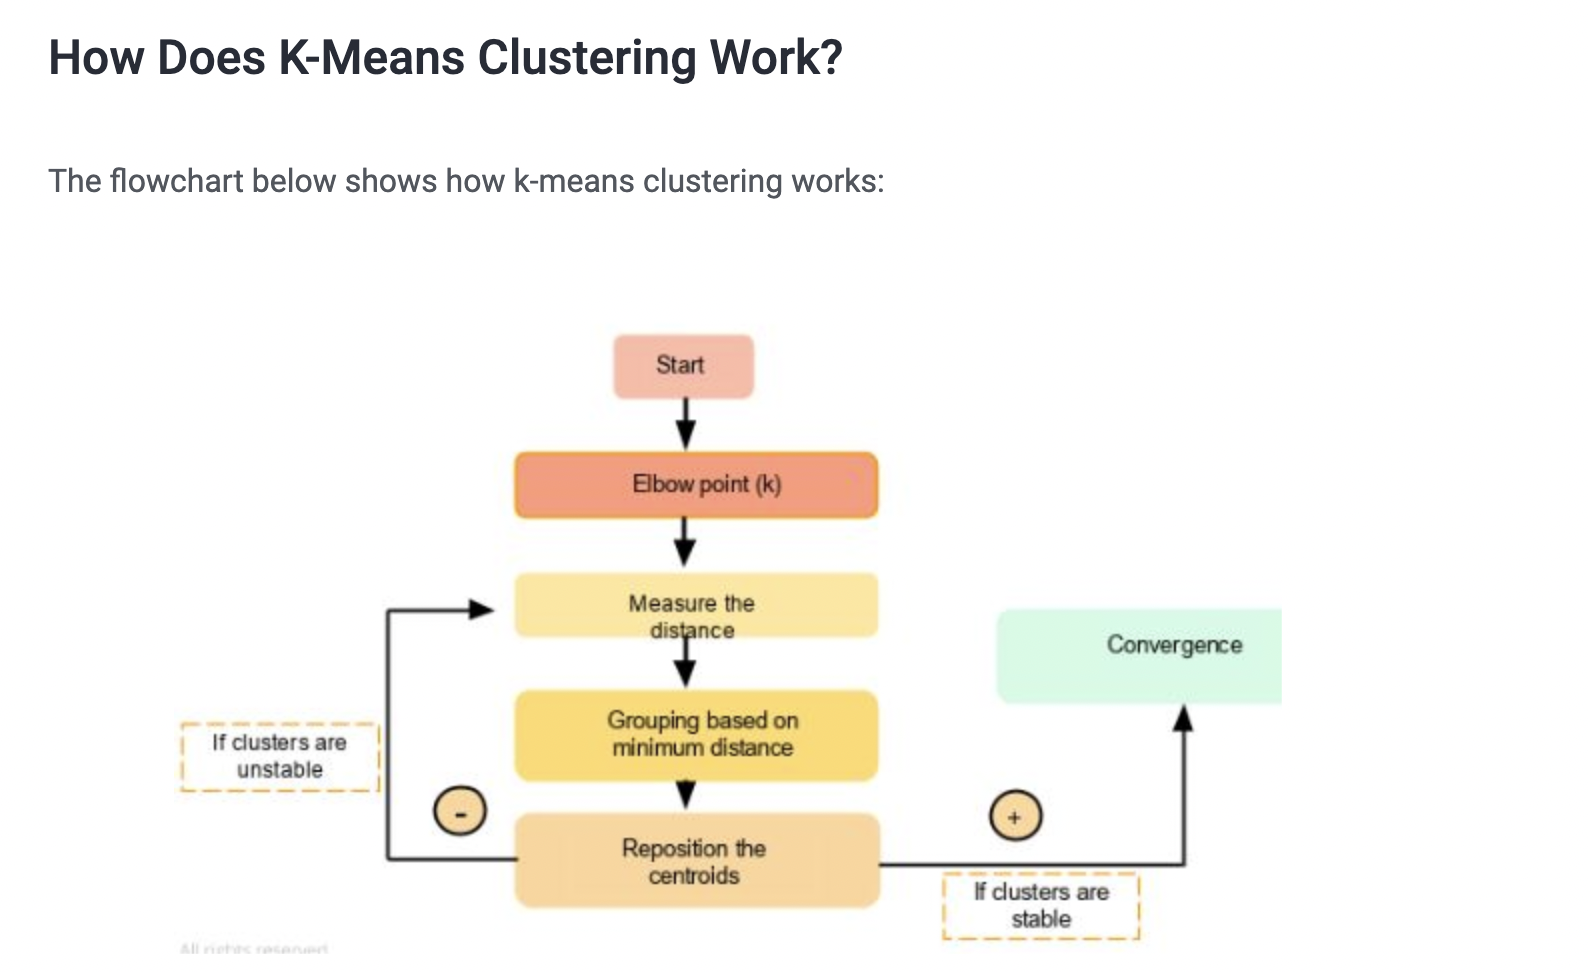

In [20]:
from IPython.display import Image
Image('/Users/rahulgarg/github/AnalyticsCourse/images/Screenshot 2021-06-08 at 9.45.41 AM.png')

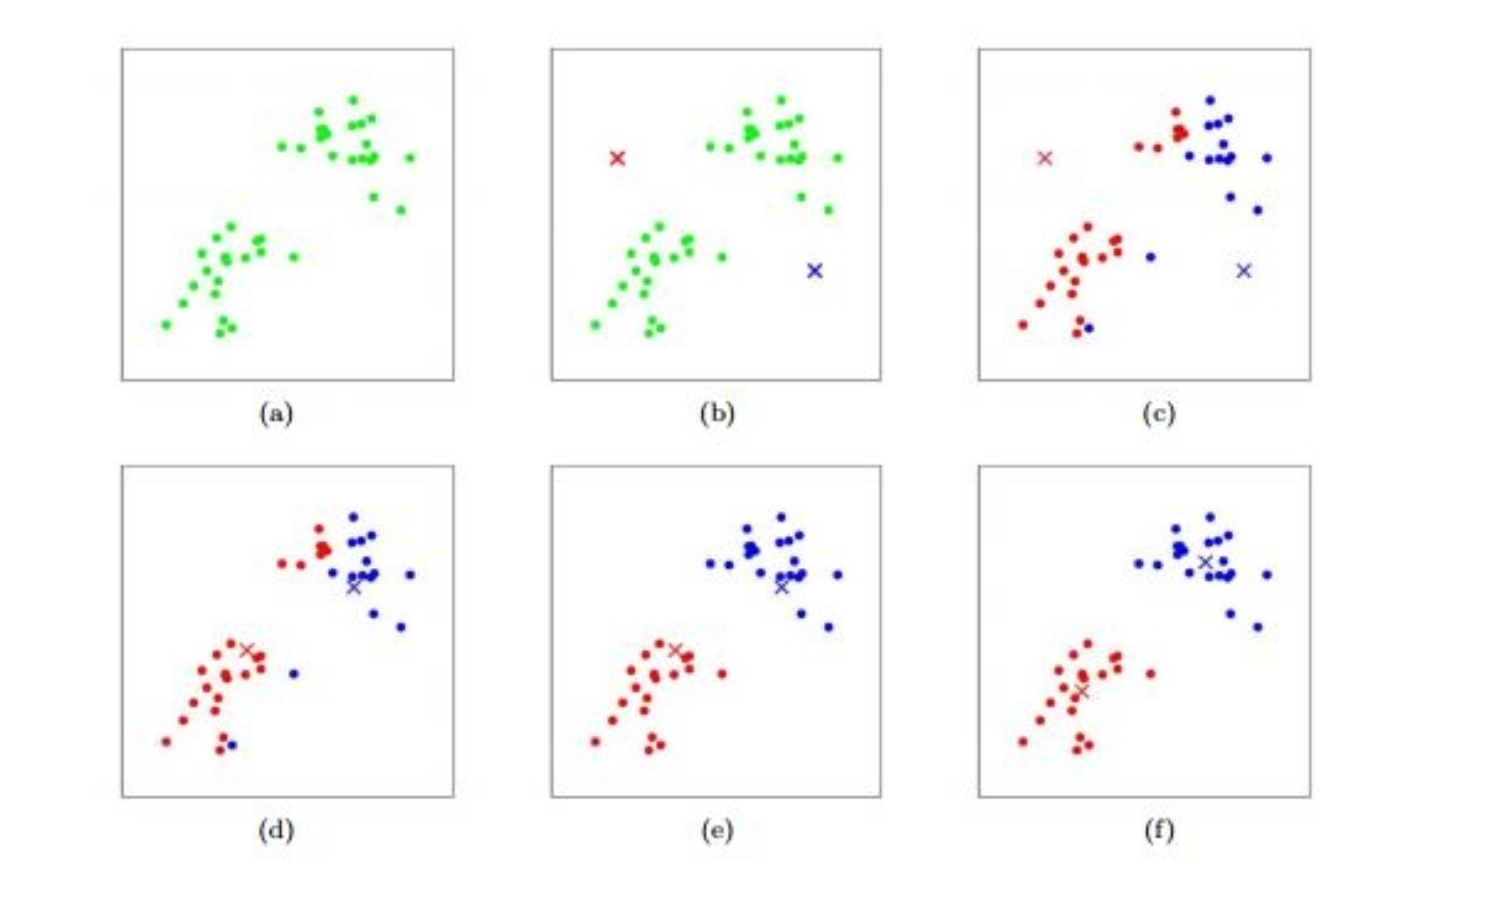

In [21]:
Image('/Users/rahulgarg/github/AnalyticsCourse/images/Screenshot 2021-06-08 at 9.49.35 AM.png')

1. Step 1 - Pick k random points as cluster centers called centroids
2. Step 2 - Assign each xi to nearest cluster by calculating its distance to each centroid
3. Step 3 - Find New Cluster centre by taking the average of the the assigned points
4. Step 4 - Repeat 2 and 3 until none of the cluster assignments change

# K Means Clusters

1. The objective of K Means is to partition data into K disjoint sets or clusters
2. we want to find out clusters that are the tighest and the farthest in the feature space/ mathematical space.
2. Let the Clusters be c1, c2, c3, ..... ck
3. c1 union c2 union c3 union ck = complete dataset
4. c1 intersection c2  = 0 i.e cluster don't overlap
5. A good cluster is one where with cluster variation or distance is minimal

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
train_df = pd.read_csv('/Users/rahulgarg/github/AnalyticsCourse/datasets/titanic/train.csv')
# Impute Missing Values
train_df['Age'] = train_df.Age.fillna(28.0)

train_df['Fare'] = train_df['Fare'].astype(int)

train_df['Embarked'] = train_df.Embarked.fillna('S')
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket  Fare Cabin Embarked  
0      0         A/5 21171     7   NaN        S  
1      0          PC 17599    71   C85        C  
2      0  STON/O2. 3101282     7   NaN        S  
3      0            113803    53  C123        S  
4      0            373450     8   NaN        S

In [99]:
age_frequency_df = train_df.Age.value_counts().reset_index()
age_frequency_df.rename(columns = {'index':'Age','Age':'Count'}, inplace = True)

In [100]:
age_frequency_df

Age  Count
0   28.00    202
1   24.00     30
2   22.00     27
3   18.00     26
4   19.00     25
..    ...    ...
83  55.50      1
84  70.50      1
85  66.00      1
86  23.50      1
87   0.42      1

[88 rows x 2 columns]

Text(0, 0.5, 'Frequency/Count')

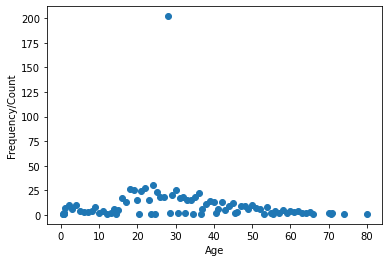

In [102]:
plt.scatter(age_frequency_df.Age, age_frequency_df.Count)
plt.xlabel('Age')
plt.ylabel('Frequency/Count')

In [107]:
X = age_frequency_df

In [120]:
age_frequency_df

Age  Count
0   28.00    202
1   24.00     30
2   22.00     27
3   18.00     26
4   19.00     25
..    ...    ...
83  55.50      1
84  70.50      1
85  66.00      1
86  23.50      1
87   0.42      1

[88 rows x 2 columns]

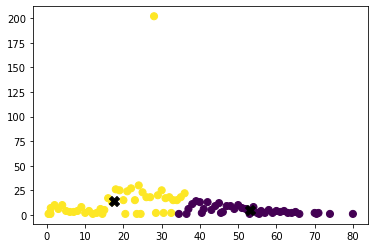

In [150]:
#Import the K-Means Class
from sklearn.cluster import KMeans # Import
#Initializr the K-Means object. Set number of clusters to 3,
#centroid initilalization as 'random' and maximum iterations to 10

kmeans = KMeans(n_clusters=2, init='random', max_iter=10) # Instantiate

#Compute the K-Means clustering
kmeans.fit(X)
#Predict the classes for every point
y_pred = kmeans.predict(X)
#Plot the data points again but with different colors for different classes
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred, s=50)
#Get the list of the final centroids
centroids = kmeans.cluster_centers_
#Plot the centroids onto the same scatterplot.
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X')

In [147]:
kmeans.inertia_

15508.818565957448

In [ ]:
Variance_cluster1  = Sigma(x-xbar)**2
Variance_cluster2  = Sigma(x-xbar)**2
Variance_cluster3  = Sigma(x-xbar)**2
Variance_cluster4  = Sigma(x-xbar)**2

In [ ]:
TotalVariance = Variance_cluster1 + Variance_cluster2 +Variance_cluster3 +Variance_cluster4

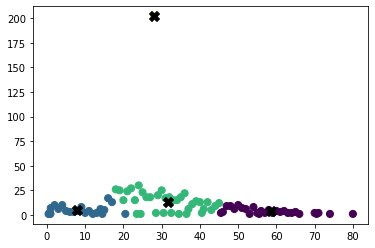

In [151]:
#Import the K-Means Class
from sklearn.cluster import KMeans # Import
#Initializr the K-Means object. Set number of clusters to 3,
#centroid initilalization as 'random' and maximum iterations to 10

kmeans = KMeans(n_clusters=4, init='random', max_iter=10) # Instantiate

#Compute the K-Means clustering
kmeans.fit(X)
#Predict the classes for every point
y_pred = kmeans.predict(X)
#Plot the data points again but with different colors for different classes
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred, s=50)
#Get the list of the final centroids
centroids = kmeans.cluster_centers_
#Plot the centroids onto the same scatterplot.
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X')

In [144]:
kmeans.inertia_

51531.82876458333

In [152]:
kmeans.labels_

array([3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1,
       1, 1, 0, 2, 2, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1],
      dtype=int32)

In [164]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_)[0].reset_index()
cluster_centers

index          0
0      0  58.660714
1      1   7.982917
2      2  31.571429
3      3  28.000000

In [159]:
age_frequency_df['cluster_number'] = kmeans.labels_


In [160]:
age_frequency_df

Age  Count  cluster_number
0   28.00    202               3
1   24.00     30               2
2   22.00     27               2
3   18.00     26               2
4   19.00     25               2
..    ...    ...             ...
83  55.50      1               0
84  70.50      1               0
85  66.00      1               0
86  23.50      1               2
87   0.42      1               1

[88 rows x 3 columns]

In [165]:
pd.merge(age_frequency_df, cluster_centers, left_on = 'cluster_number', right_on = 'index')

Age  Count  cluster_number  index          0
0   28.0    202               3      3  28.000000
1   24.0     30               2      2  31.571429
2   22.0     27               2      2  31.571429
3   18.0     26               2      2  31.571429
4   19.0     25               2      2  31.571429
..   ...    ...             ...    ...        ...
83  80.0      1               0      0  58.660714
84  53.0      1               0      0  58.660714
85  55.5      1               0      0  58.660714
86  70.5      1               0      0  58.660714
87  66.0      1               0      0  58.660714

[88 rows x 5 columns]

In [ ]:
age_frequency_df['cluster_age']  =a

In [ ]:
Variance_cluster1  = Sigma(x-xbar)**2
Variance_cluster2  = Sigma(x-xbar)**2

In [ ]:
TotalVariance = Variance_cluster1 + Variance_cluster2

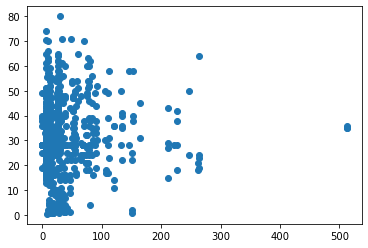

In [53]:
plt.scatter(train_df.Fare, train_df.Age)

# K Means sklearn

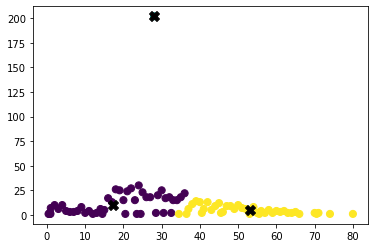

In [137]:
#Import the K-Means Class
from sklearn.cluster import KMeans
#Initializr the K-Means object. Set number of clusters to 3,
#centroid initilalization as 'random' and maximum iterations to 10

kmeans = KMeans(n_clusters=3, init='random', max_iter=10)
#Compute the K-Means clustering
kmeans.fit(X)
#Predict the classes for every point
y_pred = kmeans.predict(X)
#Plot the data points again but with different colors for different classes
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred, s=50)
#Get the list of the final centroids
centroids = kmeans.cluster_centers_
#Plot the centroids onto the same scatterplot.
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X')

In [138]:
import seaborn as sns

Text(0, 0.5, 'Inertia/ Variance')

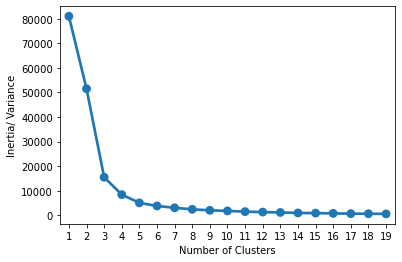

In [149]:
#List that will hold the sum of square values for different cluster sizes
ss = []
#We will compute SS for cluster sizes between 1 and 8.
for i in range(1,20):
   #Initialize the KMeans object and call the fit method to compute clusters
   kmeans = KMeans(n_clusters=i, random_state=0, max_iter=10, init='random').fit(X)
   #Append the value of SS for a particular iteration into the ss list
   ss.append(kmeans.inertia_)
    
#Plot the Elbow Plot of SS v/s K
sns.pointplot(x=[j for j in range(1,20)], y=ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia/ Variance')

Text(0, 0.5, 'Fare')

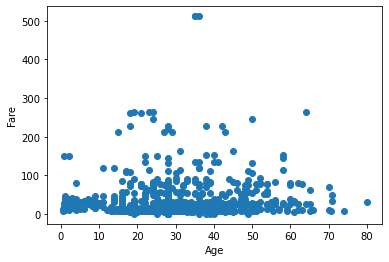

In [167]:
plt.scatter(train_df.Age, train_df.Fare)
plt.xlabel('Age')
plt.ylabel('Fare')

In [171]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket  Fare Cabin Embarked  
0      0         A/5 21171     7   NaN        S  
1      0          PC 17599    71   C85        C  
2      0  STON/O2. 3101282     7   NaN        S  
3      0            113803    53  C123        S  
4      0            373450     8   NaN        S

In [174]:
# Create Dummy Columns
from sklearn import preprocessing #import
le_gender = preprocessing.LabelEncoder() #instantiate
le_gender.fit(train_df.Sex) #Fit

LabelEncoder()

In [175]:
train_df['gender_encoded'] =le_gender.transform(train_df.Sex)

In [176]:
# Create Dummy Columns
from sklearn import preprocessing #import
le_embarked = preprocessing.LabelEncoder() #instantiate
le_embarked.fit(train_df.Embarked) #Fit

LabelEncoder()

In [177]:
train_df['embarked_encoded'] =le_embarked.transform(train_df.Embarked)

In [178]:
train_df.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket  Fare Cabin Embarked  gender_encoded  embarked_encoded  
0      0  A/5 21171     7   NaN        S               1                 2  
1      0   PC 17599    71   C85        C               0                 0

In [190]:
X  = train_df.loc[:,['Age', 'Fare','embarked_encoded', 'gender_encoded']]

In [191]:
X

Age  Fare  embarked_encoded  gender_encoded
0    22.0     7                 2               1
1    38.0    71                 0               0
2    26.0     7                 2               0
3    35.0    53                 2               0
4    35.0     8                 2               1
..    ...   ...               ...             ...
886  27.0    13                 2               1
887  19.0    30                 2               0
888  28.0    23                 2               0
889  26.0    30                 0               1
890  32.0     7                 1               1

[891 rows x 4 columns]

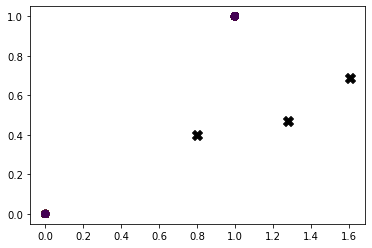

In [198]:
#Import the K-Means Class
from sklearn.cluster import KMeans
#Initializr the K-Means object. Set number of clusters to 3,
#centroid initilalization as 'random' and maximum iterations to 10

kmeans = KMeans(n_clusters=3, init='random', max_iter=10)
#Compute the K-Means clustering
kmeans.fit(X)
#Predict the classes for every point
y_pred = kmeans.predict(X)
#Plot the data points again but with different colors for different classes
plt.scatter(X.iloc[:, 3], X.iloc[:, 3], c=y_pred, s=50)
#Get the list of the final centroids
centroids = kmeans.cluster_centers_
#Plot the centroids onto the same scatterplot.
plt.scatter(centroids[:, 2], centroids[:, 3], c='black', s=100, marker='X')

In [193]:
centroids

array([[ 34.71070423,  82.97183099,   1.28169014,   0.47183099],
       [ 28.27880658,  15.03429355,   1.60631001,   0.68861454],
       [ 30.85      , 278.95      ,   0.8       ,   0.4       ]])

In [185]:
X

Age  Fare  embarked_encoded
0    22.0     7                 2
1    38.0    71                 0
2    26.0     7                 2
3    35.0    53                 2
4    35.0     8                 2
..    ...   ...               ...
886  27.0    13                 2
887  19.0    30                 2
888  28.0    23                 2
889  26.0    30                 0
890  32.0     7                 1

[891 rows x 3 columns]